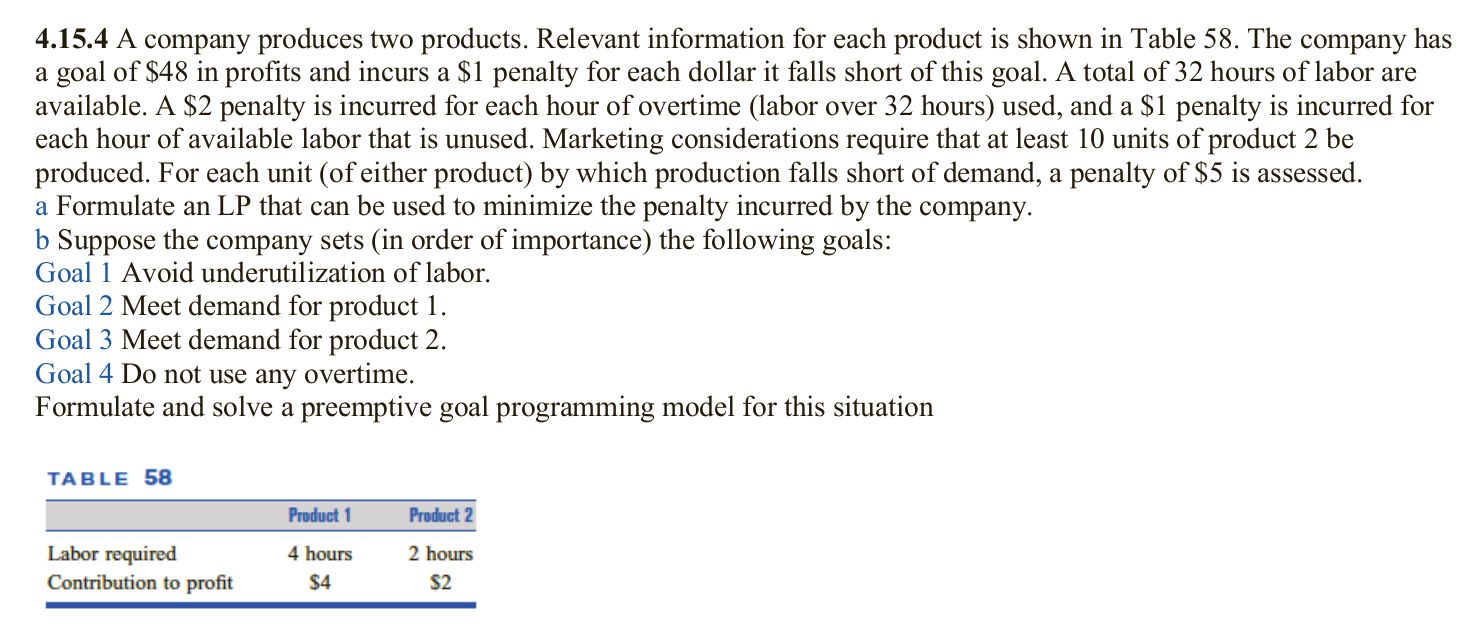

In [5]:
from IPython.display import Image
Image("Screenshot from 2020-06-13 20-32-07.png")

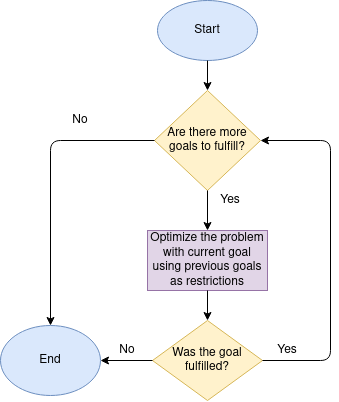

In [6]:
from IPython.display import Image
Image("Untitled Diagram(11).png")

# Variable definition
#### Variables concerning hours of labor
* L1: labor hours producing product 1
* L2: labor hours in product 2
* sn1: extra labor hours (negative surplus: how much above 32)
* sp1:  free labor hours (positive surplus: how much below 32)

### Goal 1: avoid underutilisation of labor.
In other words, minimize sp1.

In [26]:
# import necessary libraries
import numpy as np
from gekko import GEKKO

# create session for optimization
goal1 =  GEKKO(remote=False)

# define variables
L1 = goal1.Var(lb=0)  #lb is lower bound
L2 = goal1.Var(lb=0)
s1n = goal1.Var(lb=0)
s1p = goal1.Var(lb=0)

# constraints
goal1.Equation(L1 + L2 +s1n-s1p==32)

# define objective function
goal1.Minimize(s1n)

# solve
goal1.solve()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              4
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.00000E+01  3.20000E+01
    1  0.00000E+00  0.00000E+00
    3 

#### Viewing values: we can print each variable to see it's value.

In [12]:
print(L1.value)
print(L2.value)

[16.0]
[16.0]


### Goal 2: meet demand for product one.
* As in the flowchart, we use the previous goal as constraint. We do so by setting s1p to be equal to 0.
#### New variables:
* s2p: how much exceeding demand for product 1
* s2n how much missing to comply with demand of product 1

In [27]:
# create session for optimization
goal2 =  GEKKO(remote=False)

# define variables
L1 = goal2.Var(lb=0)  #lb is lower bound
L2 = goal2.Var(lb=0)
s1n = goal2.Var(lb=0)
s1p = goal2.Var(lb=0)
s2n = goal2.Var(lb=0)
s2p = goal2.Var(lb=0)


# constraints
goal2.Equation(L1+L2+s1n-s1p==32)  # labor equation
goal2.Equation(L1/4 +s2n-s2p==10) # demand for product 1 equation

# previous goals (more constraints)
goal2.Equation(s1n==0)

# define objective function
goal2.Minimize(s2n)

# solve
goal2.solve()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              6
 Number of total equations: -            3
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.78788E+00  3.20000E+01
    1  1.93750E+00  1.00000E-10
    2 

In [20]:
# view values
print(L1.value)
print(L2.value)

[40.0]
[0.0]


### Goal 3: meet demand for product 2.
* As in the flowchart, we use the previous goals as constraints. We add meeting the demand for product by adding sn2 as 0.
#### New variables:
* s3p: how much exceeding demand for product 2
* s3n how much missing to comply with demand of product 2]

In [28]:
# create session for optimization
goal3 =  GEKKO(remote=False)

# define variables
L1 = goal3.Var(lb=0)  #lb is lower bound
L2 = goal3.Var(lb=0)
s1n = goal3.Var(lb=0)
s1p = goal3.Var(lb=0)
s2n = goal3.Var(lb=0)
s2p = goal3.Var(lb=0)
s3n = goal3.Var(lb=0)
s3p = goal3.Var(lb=0)


# constraints
goal3.Equation(L1+L2+s1n-s1p==32)  # labor equation
goal3.Equation(L1/4+s2n-s2p==10) # demand for product 1 equation
goal3.Equation(L2/2 +s3n-s3p==10) # demand for product 2 equation

# previous goals (more constraints)
goal3.Equation(s1n==0)
goal3.Equation(s2n==0)

# define objective function
goal3.Minimize(s3n)

# solve
goal3.solve()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:              8
 Number of total equations: -            5
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.00000E+01  3.20000E+01
    1  9.75000E+00  0.00000E+00
    2 

In [29]:
# view values
print(L1.value)
print(L2.value)

[40.0]
[20.0]


### Goal 4: do not use overtime
* As in the flowchart, we use the previous goals as constraints. We add meeting the demand for products by adding sn2 and sn3 as 0.
* We now just minimize s1p: if it is 0, we fulfilled the goal.

In [30]:
# create session for optimization
goal4 =  GEKKO(remote=False)

# define variables
L1 = goal4.Var(lb=0)  #lb is lower bound
L2 = goal4.Var(lb=0)
s1n = goal4.Var(lb=0)
s1p = goal4.Var(lb=0)
s2n = goal4.Var(lb=0)
s2p = goal4.Var(lb=0)
s3n = goal4.Var(lb=0)
s3p = goal4.Var(lb=0)


# constraints
goal4.Equation(L1+L2+s1n-s1p==32)  # labor equation
goal4.Equation(L1/4+s2n-s2p==10) # demand for product 1 equation
goal4.Equation(L2/2 +s3n-s3p==20) # demand for product 2 equation

# previous goals (more constraints)
goal4.Equation(s1n==0)
goal4.Equation(s2n==0)
goal4.Equation(s3n==0)

# define objective function
goal4.Minimize(s1p)

# solve
goal4.solve()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:              8
 Number of total equations: -            6
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              2
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.80000E+01  3.20000E+01
    2  4.80000E+01  0.00000E+00
 Succe

In [31]:
print(L1.value)
print(L2.value)

[40.0]
[40.0]
